In [4]:
import numpy as np
import csv
from matplotlib import pyplot as plt
import random
%matplotlib inline
import skimage
from sklearn import cross_validation
import time
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import os

In [5]:
path = os.getcwd()

In [3]:
## Loading data ##

# Load all training inputs to a python list
train_inputs = []
with open('E:\\Min\\ml\\project3\\data_and_scripts\\data_and_scripts\\train_inputs.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip the header
    for train_input in reader: 
        train_input_no_id = []
        for pixel in train_input[1:]: # Start at index 1 to skip the Id
            train_input_no_id.append(float(pixel))
        train_inputs.append(train_input_no_id) 

# Load all training ouputs to a python list
train_outputs = []
with open('E:\\Min\\ml\\project3\\data_and_scripts\\data_and_scripts\\train_outputs.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip the header
    for train_output in reader:  
        train_output_no_id = int(train_output[1])
        train_outputs.append(train_output_no_id)

In [150]:
## convert_to_numpy ##
# Convert python lists to numpy arrays
train_inputs_np = np.asarray(train_inputs)
train_outputs_np = np.asarray(train_outputs)

# Save as numpy array files
np.save('train_inputs', train_inputs_np)
np.save('train_outputs', train_outputs_np)

In [6]:
## Load numpy array files ##
train_inputs = np.load(path+'\\train_inputs.npy')
train_outputs = np.load(path+'\\train_outputs.npy')


In [17]:
## Tuning parameters with grid search and cross validation ##

# Spliting the training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_outputs, test_size=0.2, train_size = 0.8, random_state=0)

# Set the parameters by grid search and cross-validation
clf = SGDClassifier(loss='hinge',alpha=0.0001, n_iter=5, random_state=42, n_jobs = -1)
tuned_parameters = { 'alpha': (1e-1, 1e-2, 1e-3, 1e-4),
                     'l1_ratio':(.1, .2),
                     'penalty':('l2','elasticnet')
                   }  

scores = ['precision']                                      # Scorer function used to choose the best parameters for the model
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print('\n')

    gs_clf = GridSearchCV(clf, tuned_parameters, cv=5,      # 5-fold cross validation in grid search to find the best parameters
                       scoring='%s_weighted' % score)
    gs_clf.fit(X_train, y_train)                            # Using the best parameters to fit the training data to linear svm

    print("Best parameters set found on development set:")
    print('\n')
    print(gs_clf.best_params_)
    print('\n')
    print("Grid scores on development set:")
    print('\n')
    for params, mean_score, scores in gs_clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print('\n')
    print("Detailed classification report:")
    print('\n')
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print('\n')
    y_true, y_pred = y_test, gs_clf.predict(X_test)
    print(classification_report(y_true, y_pred))


G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
G:\Anaconda3\lib\sit

# Tuning hyper-parameters for precision


Best parameters set found on development set:


{'penalty': 'l2', 'alpha': 0.01, 'l1_ratio': 0.1}


Grid scores on development set:


0.323 (+/-0.036) for {'penalty': 'l2', 'alpha': 0.1, 'l1_ratio': 0.1}
0.010 (+/-0.001) for {'penalty': 'elasticnet', 'alpha': 0.1, 'l1_ratio': 0.1}
0.323 (+/-0.036) for {'penalty': 'l2', 'alpha': 0.1, 'l1_ratio': 0.2}
0.010 (+/-0.001) for {'penalty': 'elasticnet', 'alpha': 0.1, 'l1_ratio': 0.2}
0.336 (+/-0.036) for {'penalty': 'l2', 'alpha': 0.01, 'l1_ratio': 0.1}
0.257 (+/-0.039) for {'penalty': 'elasticnet', 'alpha': 0.01, 'l1_ratio': 0.1}
0.336 (+/-0.036) for {'penalty': 'l2', 'alpha': 0.01, 'l1_ratio': 0.2}
0.228 (+/-0.068) for {'penalty': 'elasticnet', 'alpha': 0.01, 'l1_ratio': 0.2}
0.331 (+/-0.055) for {'penalty': 'l2', 'alpha': 0.001, 'l1_ratio': 0.1}
0.331 (+/-0.019) for {'penalty': 'elasticnet', 'alpha': 0.001, 'l1_ratio': 0.1}
0.331 (+/-0.055) for {'penalty': 'l2', 'alpha': 0.001, 'l1_ratio': 0.2}
0.33

G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
G:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


G:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


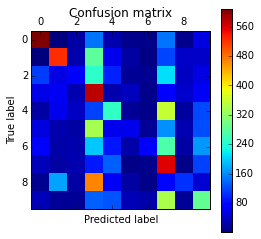

In [18]:
## Calculate the confusion matrix ##
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
